# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
            
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papao
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | sisimiut
Processing Record 4 of Set 1 | hammerfest
Processing Record 5 of Set 1 | tofol
Processing Record 6 of Set 1 | kuraymah
Processing Record 7 of Set 1 | iskateley
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | yung shue wan
Processing Record 11 of Set 1 | berdigestyakh
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | qui nhon
Processing Record 15 of Set 1 | bahia blanca
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | awjilah
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | asau
Processing Record 22 of Set 1 | shihezi
Processing Record 23 of 

Processing Record 44 of Set 4 | trairi
Processing Record 45 of Set 4 | saint-quentin
Processing Record 46 of Set 4 | new norfolk
Processing Record 47 of Set 4 | swakopmund
Processing Record 48 of Set 4 | mpika
Processing Record 49 of Set 4 | santa ana
Processing Record 0 of Set 5 | codrington
Processing Record 1 of Set 5 | tchibanga
Processing Record 2 of Set 5 | yuzhno-kurilsk
Processing Record 3 of Set 5 | tambura
Processing Record 4 of Set 5 | mount isa
Processing Record 5 of Set 5 | egilsstadir
Processing Record 6 of Set 5 | sejenane
Processing Record 7 of Set 5 | anadyr
Processing Record 8 of Set 5 | udachny
Processing Record 9 of Set 5 | hithadhoo
Processing Record 10 of Set 5 | vilyuchinsk
Processing Record 11 of Set 5 | veroia
Processing Record 12 of Set 5 | stanley
Processing Record 13 of Set 5 | terrace
Processing Record 14 of Set 5 | pathein
Processing Record 15 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 16 of Set 5 | minden
Processing Record 17 of S

Processing Record 32 of Set 8 | carutapera
Processing Record 33 of Set 8 | guozhen
Processing Record 34 of Set 8 | umm kaddadah
Processing Record 35 of Set 8 | kourou
Processing Record 36 of Set 8 | baie-comeau
Processing Record 37 of Set 8 | lazaro cardenas
Processing Record 38 of Set 8 | caibarien
Processing Record 39 of Set 8 | san juan de miraflores
Processing Record 40 of Set 8 | titel
Processing Record 41 of Set 8 | chaparral
Processing Record 42 of Set 8 | sumbe
Processing Record 43 of Set 8 | lepsy
Processing Record 44 of Set 8 | port macquarie
Processing Record 45 of Set 8 | cumaral
Processing Record 46 of Set 8 | homer
Processing Record 47 of Set 8 | alajarvi
Processing Record 48 of Set 8 | laojunmiao
Processing Record 49 of Set 8 | manta
Processing Record 0 of Set 9 | mount gambier
Processing Record 1 of Set 9 | saint-philippe
Processing Record 2 of Set 9 | al-hamdaniya
Processing Record 3 of Set 9 | kerema
Processing Record 4 of Set 9 | konstantinovsk
Processing Record 5 of

Processing Record 21 of Set 12 | fort mcmurray
Processing Record 22 of Set 12 | ouellah
City not found. Skipping...
Processing Record 23 of Set 12 | tyul'kubas
City not found. Skipping...
Processing Record 24 of Set 12 | shahr-e babak
Processing Record 25 of Set 12 | pisco
Processing Record 26 of Set 12 | pirot
Processing Record 27 of Set 12 | ambodifotatra
Processing Record 28 of Set 12 | tibiri
Processing Record 29 of Set 12 | port douglas
Processing Record 30 of Set 12 | porto novo
Processing Record 31 of Set 12 | itoman
Processing Record 32 of Set 12 | ghat
Processing Record 33 of Set 12 | okhotsk
Processing Record 34 of Set 12 | teknaf
Processing Record 35 of Set 12 | dolinsk
Processing Record 36 of Set 12 | karratha
Processing Record 37 of Set 12 | zhangye
Processing Record 38 of Set 12 | morondava
Processing Record 39 of Set 12 | kpandu
Processing Record 40 of Set 12 | bhisho
Processing Record 41 of Set 12 | duyun
Processing Record 42 of Set 12 | sioux center
Processing Record 4

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papao,-17.7500,-149.5500,29.82,83,100,11.17,PF,1701659354
1,puerto natales,-51.7236,-72.4875,4.85,98,74,1.94,CL,1701659648
2,sisimiut,66.9395,-53.6735,-6.14,82,100,2.18,GL,1701659652
3,hammerfest,70.6634,23.6821,0.25,86,75,4.12,NO,1701659383
4,tofol,5.3248,163.0078,28.88,79,75,6.17,FM,1701659395


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papao,-17.7500,-149.5500,29.82,83,100,11.17,PF,1701659354
1,puerto natales,-51.7236,-72.4875,4.85,98,74,1.94,CL,1701659648
2,sisimiut,66.9395,-53.6735,-6.14,82,100,2.18,GL,1701659652
3,hammerfest,70.6634,23.6821,0.25,86,75,4.12,NO,1701659383
4,tofol,5.3248,163.0078,28.88,79,75,6.17,FM,1701659395


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

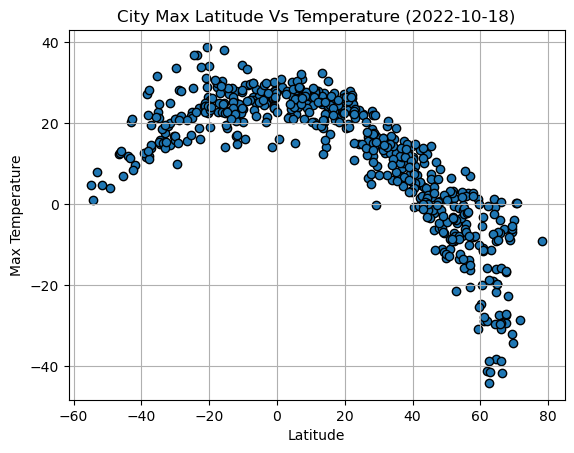

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude Vs Temperature (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

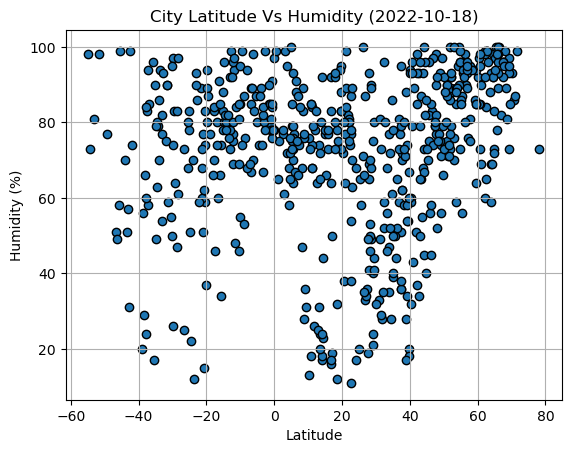

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

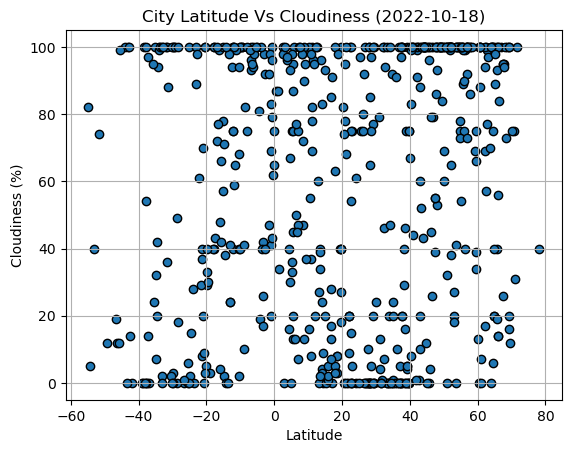

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

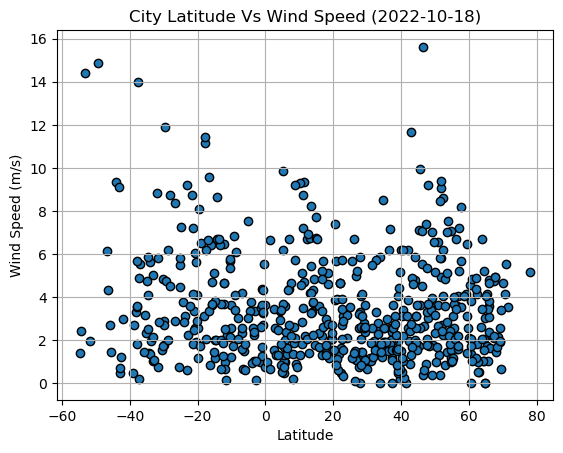

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sisimiut,66.9395,-53.6735,-6.14,82,100,2.18,GL,1701659652
3,hammerfest,70.6634,23.6821,0.25,86,75,4.12,NO,1701659383
4,tofol,5.3248,163.0078,28.88,79,75,6.17,FM,1701659395
5,kuraymah,18.5500,31.8500,21.61,32,8,5.12,SD,1701659659
6,iskateley,67.6803,53.1512,-16.79,96,95,4.94,RU,1701659660


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papao,-17.7500,-149.5500,29.82,83,100,11.17,PF,1701659354
1,puerto natales,-51.7236,-72.4875,4.85,98,74,1.94,CL,1701659648
7,adamstown,-25.0660,-130.1015,22.67,83,100,5.48,PN,1701659662
8,atafu village,-8.5421,-172.5159,29.39,76,82,6.07,TK,1701659663
11,west island,-12.1568,96.8225,27.99,69,40,4.63,CC,1701659666


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7872838688769995


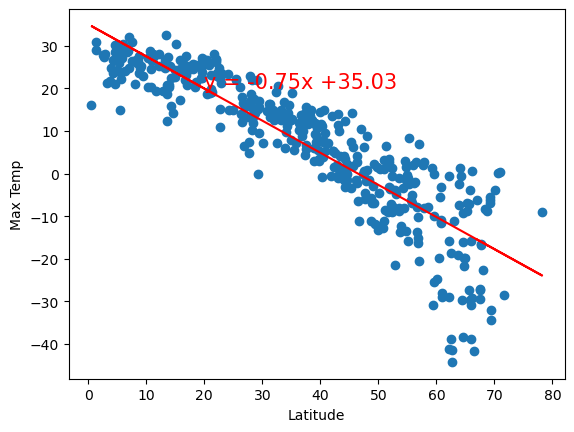

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()


The r-value is: 0.3812997376462049


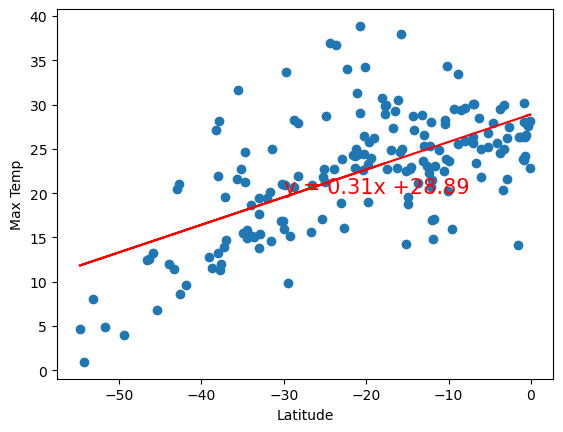

In [17]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 

The closer the latitude gets to zero the warmer the max temperture 
there is a postive correlation between max temperture and the latitude 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13500822838140192


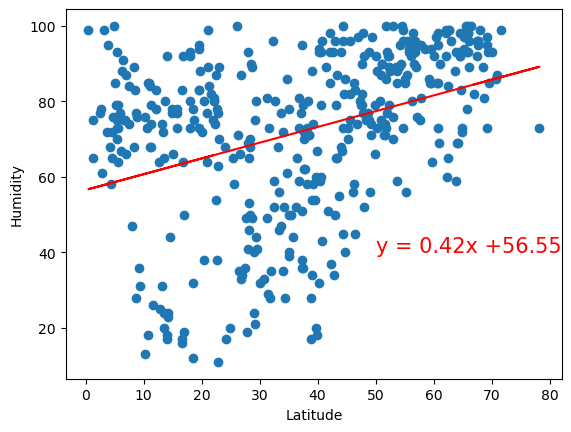

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.06102899689036374


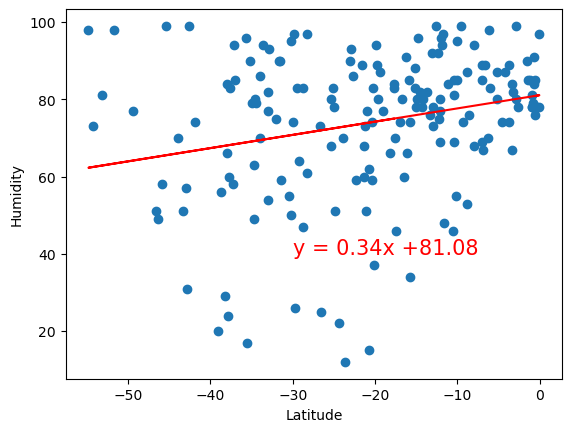

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
There is a week correlation between humididity and maxium tempertature as the r value is low 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05246370971083433


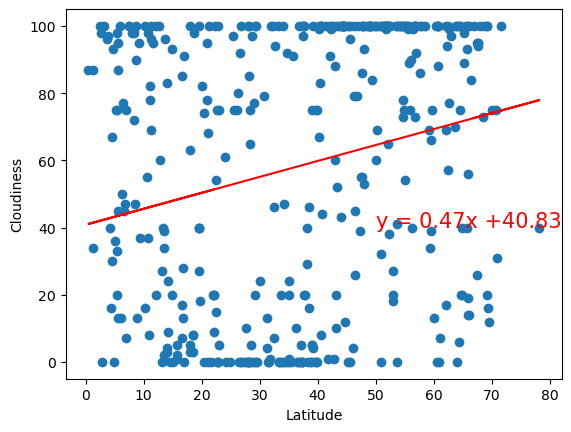

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.06148874989190167


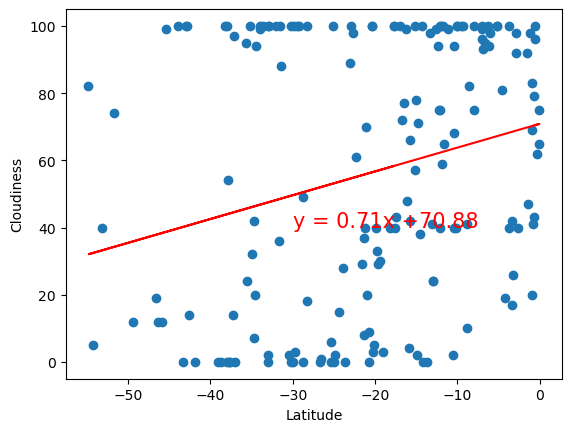

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Weak correlation between cloudiness and latitiude due to low r value


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 5.562729051638818e-05


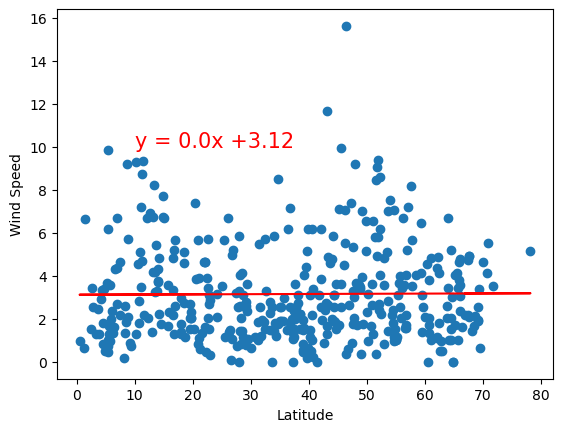

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.034572120887751114


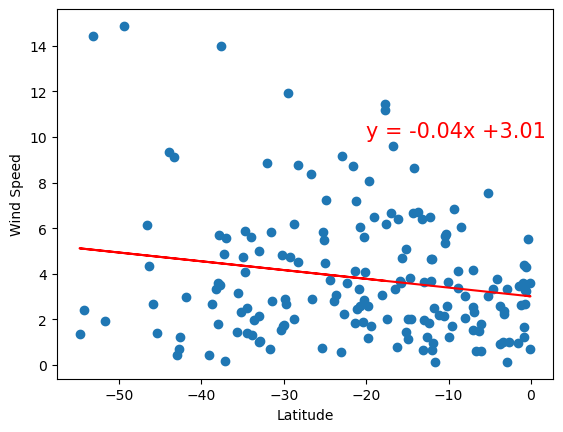

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Weak relationship between latitude and wind speed from